# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [6]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# 2. Collect and load data

In [7]:
data = pd.read_csv('D:/ORIGINALS -COURSE ONES/SLR/SLR Mini Project/SLR Mini Project 2.0/bigcity.csv')
data

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


# 3. Explore numeric variables - five number summary

In [11]:

numdata = data.select_dtypes(include = np.number)
numdata.describe()
numdata.dtypes

u    int64
x    int64
dtype: object

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

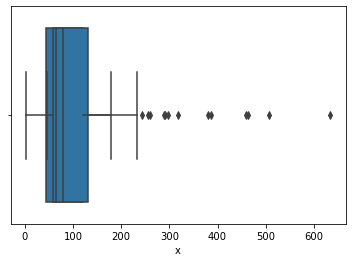

In [10]:
for i in numdata.columns:
    sns.boxplot(numdata[i])

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='u', ylabel='x'>

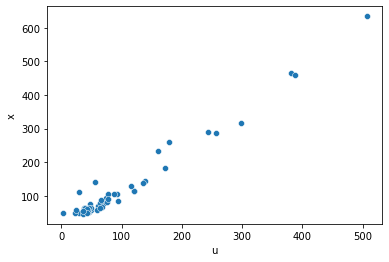

In [12]:
sns.scatterplot(data = data , x='u',y ='x')

In [13]:
pd.crosstab(data['u'],data['x'])

x,46,48,50,52,53,54,57,58,60,61,63,64,65,67,69,75,77,79,80,85,86,89,93,104,105,106,111,113,115,130,139,142,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [16]:
data.size

98

In [17]:
data.shape

(49, 2)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [18]:
data.isna().sum()

u    0
x    0
dtype: int64

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

In [21]:
corr = data.corr()

<AxesSubplot:>

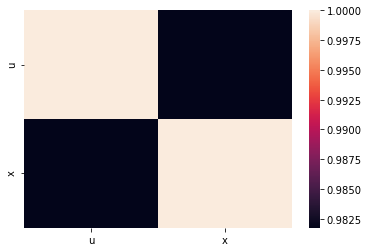

In [22]:
sns.heatmap(corr)

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [49]:
X = np.array(X)
Y = np.array(Y)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [54]:
X_train

12     71
4      48
34    120
8      30
3     179
6      29
40     64
41     56
46     43
15     74
9       2
16     50
24     77
33     67
30     94
0     138
43    116
32     45
5      37
29    256
11     46
36     66
1      93
21     60
2      61
37     46
35    172
23     50
39     44
10     38
22    507
18    381
48     36
20     78
7      23
42     40
14    298
28    243
38    121
Name: u, dtype: int64

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [28]:

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = data['u']
# extract the target variable from the data set
y = data['x']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (36,)
The shape of X_test is: (13,)
The shape of y_train is: (36,)
The shape of y_test is: (13,)


In [30]:
# build a full model using OLS()
# consider the log of claim 
linreg_full_model_withlog = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2072.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                    9.69e-33
Time:                        12:21:52   Log-Likelihood:                         -166.23
No. Observations:                  36   AIC:                                      334.5
Df Residuals:                      35   BIC:                                      336.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [82]:
np.polyfit(a,b,1)

array([1.1608637 , 6.07668787])

In [81]:
a = data['u'].head(39)
b = data['x'].head(39)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [70]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, Y_pred)
RMSE = math.sqrt(MSE)
RMSE


0.31622776601683794

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred)

0.9999931824565518

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [65]:
from sklearn. linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

Y  = logreg.predict(X_train)

logreg.score(X_train, y_train)

0.28205128205128205

In [64]:
from sklearn. linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_test,y_test)

Y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

0.9